In [15]:
import random
import numpy as np
import matplotlib.pyplot as plt
from evol import Population, Evolution

from deap import base
from deap import creator
from deap import tools

In [3]:
function_1 = lambda x: np.sin(abs(x)) * np.cos(x/2)
function_2 = lambda x, y: y * np.sin(x)

<Figure size 432x288 with 0 Axes>

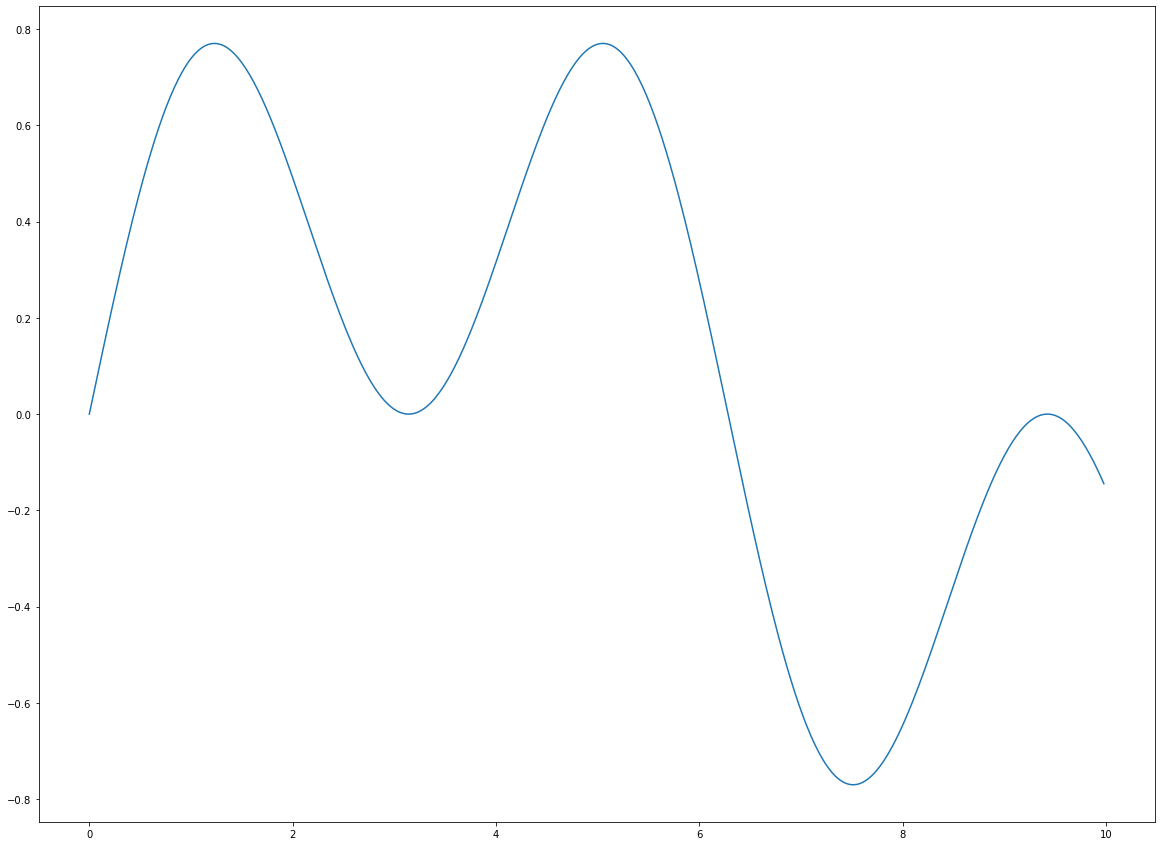

<Figure size 432x288 with 0 Axes>

In [4]:
X1 = np.arange(0, 10, 0.02)
X2 = np.arange(1, 16, 0.2)
Y = np.arange(1, 14, 0.2)
plt.figure(figsize=(20, 15))
plt.plot(X1, np.vectorize(function_1)(X1))
plt.figure()

Text(0.5, 0, 'z')

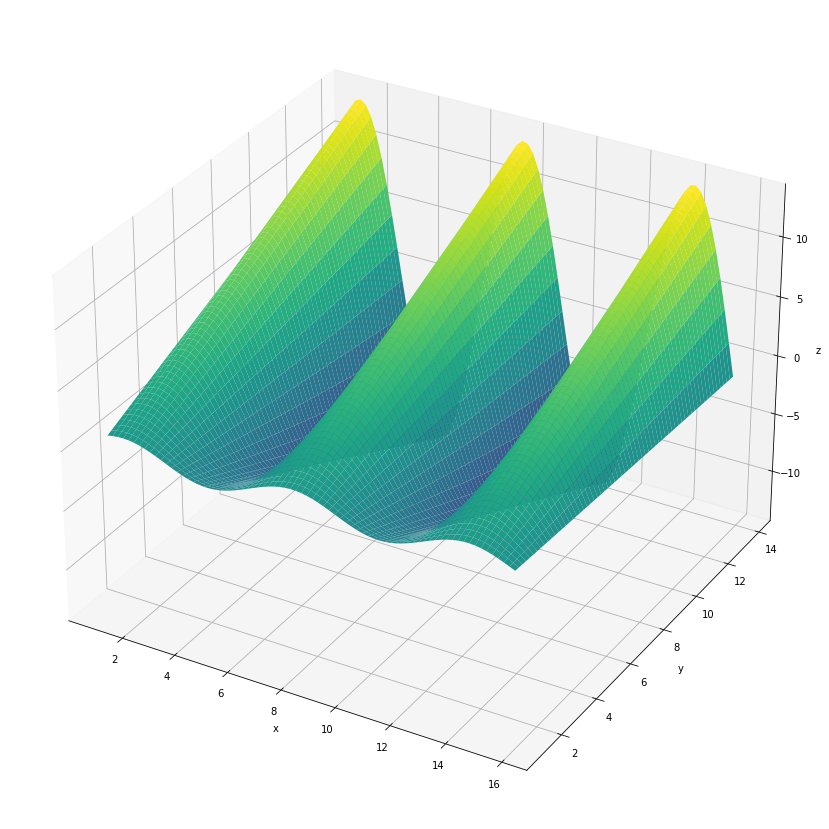

In [5]:
x_m, y_m = np.meshgrid(X2, Y)
z = np.vectorize(function_2)(x_m, y_m)
plt.figure(figsize=(20, 15))
ax = plt.axes(projection = '3d')
ax.plot_surface(x_m, y_m, z, rstride=1, cstride=1, cmap='viridis', edgecolor = 'none')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

In [6]:
random.seed(1)
parent = lambda parents: (np.random.choice(parents), np.random.choice(parents))
cross = lambda parent1, parent2: np.mean((parent1, parent2))
mutate = lambda x, sigma: x + sigma * (random.random() - 0.5)
apply_2d = lambda function, xy: tuple(function(x) for x in xy)

In [7]:
population1 = Population(
    chromosomes=X1, eval_function=function_1, maximize=False)

In [8]:
evolution1 = (Evolution()
              .survive(fraction=0.5)
              .breed(parent_picker=parent, combiner=cross)
              .mutate(mutate_function=mutate, sigma = 0.1))

In [9]:
result1 = population1.evolve( evolution=Evolution()
        .repeat(evolution1, n=10)
        .evaluate(), n=10)

In [13]:
min_x = max(evolution1, key= lambda x: x.fitness).chromosome
min_y = function_1(min_x)

AttributeError: 'Population' object has no attribute 'fitness'

In [ ]:
print("Мінімальне значення функції з однією змінною: \n x = " + str(min_x) + "\ny = " + str(min_y))

In [ ]:
population2 = Population(
    chromosomes=tuple((X2[i], Y[i]) for i in range(len(Y))), eval_function=lambda xy: function_2(*xy), maximize=False)

In [ ]:
evolution2 = (Evolution()
              .survive(fraction=0.5)
              .breed(parent_picker=parent, combiner=lambda a, b: (cross(a[0], b[0]), cross(a[1], b[1])))
              .mutate(mutate_function=lambda xy, sigma: tuple(mutate(x, sigma) for x in xy), sigma = 0.1))

In [ ]:
result2 = population2.evolve( evolution=Evolution()
        .repeat(evolution2, n=10)
        .evaluate(), n=10)

In [ ]:
max_x, max_y = max(result2, key=lambda x: x.fitness).chromosome

In [ ]:
print("Максимальне значення функції з двома змінними: \n x = " + str(max_x) + "\ny = " + str(max_y) + "\nz = " + str(function_2(max_x, max_y)))

In [ ]:
plt.show()